In [3]:
pip install geopandas

     ---------------------------------------- 0.0/51.5 kB ? eta -:--:--
     --------------- ---------------------- 20.5/51.5 kB 320.0 kB/s eta 0:00:01
     -------------------------------------- 51.5/51.5 kB 529.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ----------- ---------------------------- 0.3/1.1 MB 9.6 MB/s eta 0:00:01
   ------------------------------ --------- 0.8/1.1 MB 10.6 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 10.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/22.9 MB ? eta -:--:--
    --------------------------------------- 0.5/22.9 MB 10.0 MB/s eta 0:00:03
   - -------------------------------------- 1.0/22.9 MB 10.8 MB/s eta 0:00:03
   -- ------------------------------------- 1.6/22.9 MB 11.0 MB/s eta 0:00:02
   --- ------------------------------------ 2.1/22.9 MB 12.2 MB/s eta 0:00:02
   ---- ----------------------------------- 2.4/22.9 MB 11.9 MB/s eta 0:00:02
   ----- 

In [1]:
import geopandas

In [2]:
path_to_data = geopandas.datasets.get_path("nybb")
gdf = geopandas.read_file(path_to_data)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_26492\381257049.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  path_to_data = geopandas.datasets.get_path("nybb")


In [3]:
gdf 

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [4]:
gdf.describe()

,BoroCode,Shape_Leng,Shape_Area
count,5.000000,5.000000,5.000000e+00
mean,3.000000,558317.333911,1.685981e+09
std,1.581139,249002.452978,9.034868e+08
min,1.000000,330470.010332,6.364715e+08
25%,2.000000,359299.096471,1.186925e+09
50%,3.000000,464392.991824,1.623820e+09
75%,4.000000,741080.523166,1.937479e+09
max,5.000000,896344.047763,3.045213e+09


In [5]:
# INDEXARLO POR EL NOMBRE DEL BARRIO (AHORA SI SE PUEDE CALCULAR EL CENTROIDE)
gdf = gdf.set_index('BoroName')

In [6]:
gdf

,BoroCode,Shape_Leng,Shape_Area,geometry
BoroName,,,,
Staten Island,5,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
Queens,4,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
Brooklyn,3,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
Manhattan,1,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
Bronx,2,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [7]:
# CALCULAR AREA DE CADA BARRIO Y CUANTO ES CENTROIDE
gdf["area"] = gdf.area
gdf['centroid'] = gdf.centroid

In [8]:
gdf

,BoroCode,Shape_Leng,Shape_Area,geometry,area,centroid
BoroName,,,,,,
Staten Island,5,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",1.623822e+09,POINT (941639.450 150931.991)
Queens,4,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",3.045214e+09,POINT (1034578.078 197116.604)
Brooklyn,3,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",1.937478e+09,POINT (998769.115 174169.761)
Manhattan,1,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",6.364712e+08,POINT (993336.965 222451.437)
Bronx,2,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",1.186926e+09,POINT (1021174.790 249937.980)


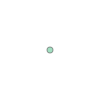

In [14]:
#CALCULAR DISTANCIA CENTROIDE A CENTROIDE
primer_punto = gdf['centroid'].iloc[0] # - ESTO ES UNA SERIE CON EL CENROIDE DEL BARRIO SOBRE EL CUAL VOY A MEDIR LOS DEMAS
primer_punto

In [15]:
#2 CALCULAR DISTANCIA DE TODOS LOS DEMAS CENTROIDES CONTRA EL PRIMERO (TODOS LOS BARRIOS CONTRA UNO)
gdf['distance'] = gdf['centroid'].distance(primer_punto)

In [16]:
gdf

,BoroCode,Shape_Leng,Shape_Area,geometry,area,centroid,distance
BoroName,,,,,,,
Staten Island,5,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",1.623822e+09,POINT (941639.450 150931.991),0.000000
Queens,4,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",3.045214e+09,POINT (1034578.078 197116.604),103781.535276
Brooklyn,3,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",1.937478e+09,POINT (998769.115 174169.761),61674.893421
Manhattan,1,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",6.364712e+08,POINT (993336.965 222451.437),88247.742789
Bronx,2,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",1.186926e+09,POINT (1021174.790 249937.980),126996.283623


<Axes: >

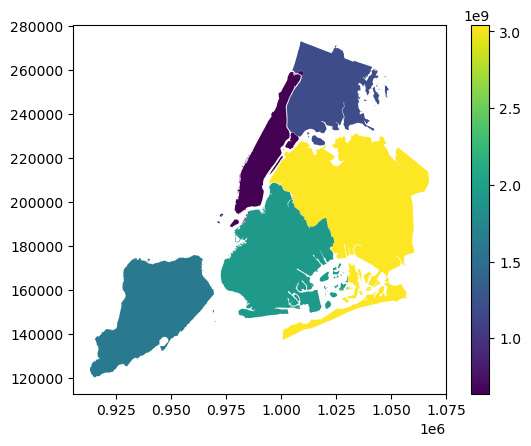

In [17]:
gdf.plot("area", legend=True)

<Axes: >

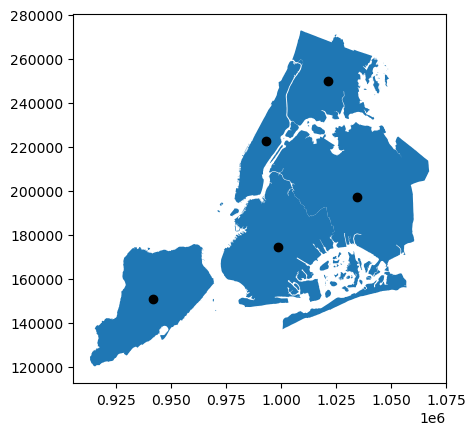

In [18]:
#DIBUJARLO CON CENTROIDE
ax = gdf["geometry"].plot()
gdf["centroid"].plot(ax=ax, color="black")